In [1]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Load the dataset into a pandas.DataFrame
ibm_df = pd.read_csv('Data/IBM.csv')
ibm_df.index = ibm_df['Date']

In [3]:
#Let's find out the shape of the DataFrame
print('Shape of the dataframe:', ibm_df.shape)

Shape of the dataframe: (1258, 7)


In [6]:
#Let's see the top rows
ibm_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-08-13,2014-08-13,188.000000,188.479996,187.369995,187.949997,152.200851,1795000
2014-08-14,2014-08-14,187.570007,188.169998,186.929993,187.880005,152.144241,1929500
2014-08-15,2014-08-15,187.850006,188.880005,186.789993,187.380005,151.739349,2814800
2014-08-18,2014-08-18,188.100006,189.809998,187.759995,189.360001,153.342712,2420300
2014-08-19,2014-08-19,190.039993,190.250000,189.360001,190.070007,153.917618,2040100


In [8]:
#Rename the second column
ibm_df.rename(columns={'Close': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Date,Open,High,Low,Close_Price,Adj Close,Volume
Date,,,,,,,
2014-08-13,2014-08-13,188.000000,188.479996,187.369995,187.949997,152.200851,1795000
2014-08-14,2014-08-14,187.570007,188.169998,186.929993,187.880005,152.144241,1929500
2014-08-15,2014-08-15,187.850006,188.880005,186.789993,187.380005,151.739349,2814800
2014-08-18,2014-08-18,188.100006,189.809998,187.759995,189.360001,153.342712,2420300
2014-08-19,2014-08-19,190.039993,190.250000,189.360001,190.070007,153.917618,2040100


In [9]:
#remove missing values
missing = (pd.isnull(ibm_df['Date'])) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 0


In [10]:
#To illustrate the idea of moving average we compute a weekly moving average taking
#a window of 5 days instead of 7 days because trading happens only during the weekdays.
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

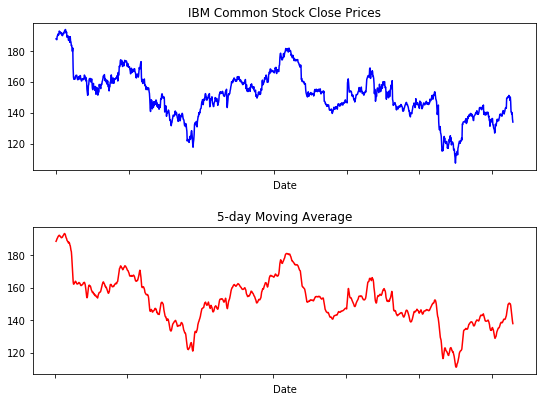

In [11]:
fig = plt.figure(figsize=(7.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
# plt.savefig('plots/ch2/B07887_02_14.png', format='png', dpi=300)

In [15]:
#Calculate the moving averages using 'rolling' and 'mean' functions
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

In [16]:
#Let's remove NaN from the above variables
MA2 = MA2.ix[~pd.isnull(MA2)]
TwoXMA2 = TwoXMA2.ix[~pd.isnull(TwoXMA2)]

MA4 = MA4.ix[~pd.isnull(MA4)]
TwoXMA4 = TwoXMA4.ix[~pd.isnull(TwoXMA4)]

MA3 = MA3.ix[~pd.isnull(MA3)]
ThreeXMA3 = TwoXMA4.ix[~pd.isnull(ThreeXMA3)]

Text(0.5,1,'3 day MA & 3X 3day MA')

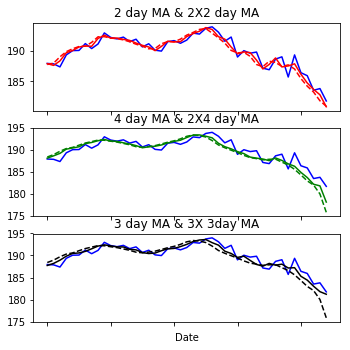

In [17]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '-', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='g', linestyle = '-', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='k', linestyle = '-', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='k', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA')
# plt.savefig('plots/ch2/B07887_02_15.png', format='png', dpi=300)